# Lab Exercise: PCA

### Create Data

In [18]:
#dummy regression data
import numpy as np
from sklearn.datasets import make_regression
X, y = make_regression(n_features=64, effective_rank =10,random_state=0, shuffle=False, n_samples=200)

### E3.1 compute PCA
see https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [19]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### E3.2 Plot Eigen Values

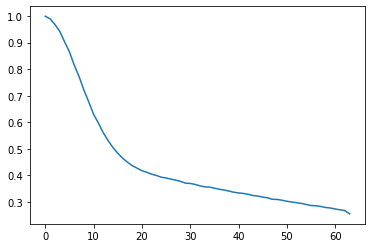

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pca.singular_values_)

### E3.3 select a $\lambda$ cut-off and project to new base

We have a clear drop of eigen-values which stalls after 30 values. Cut off for a strong compression: 25, weak compresseon (less error) >40

In [4]:
# cut of at 25:
pca = PCA(n_components=25)
pca.fit(X)
X_new = pca.transform(X)
print ("original X:",X.shape, " new basis: ", X_new.shape)
 

original X: (200, 64)  new basis:  (200, 25)


### E3.4 Train Regression model on the original data and the reduced data

In [5]:
from sklearn.ensemble import RandomForestRegressor
rf_orig = RandomForestRegressor()
rf_orig.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
rf_new = RandomForestRegressor()
rf_new.fit(X_new,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
#evaluate training error
from sklearn.metrics import mean_squared_error
pred_orig = rf_orig.predict(X)
mean_squared_error(pred_orig,y)

3.0153932586078995

In [8]:
pred_new = rf_new.predict(X_new) 
mean_squared_error(pred_new,y)

3.681162139695264

In [ ]:
# result is a bit worse, but used much less dimesnional space -> extra work: see how this works out for test data!